<a href="https://colab.research.google.com/github/Priyabrat845/Insurance-fraud-detection/blob/main/Insurance_claim_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Insurance Claims Fraud Detection**

Fraud is one of the largest & most well-known problems that insurers face. Fraudulent claims can be highly expensive for each insurer. So,it is important to know which claims are correct & which are not.  We employ various attributes about the claims, insured people & other circumstances which are included in the data by the insurer. Separating different groups of claims & the corresponding rates of fraud within those groups can provide new insights.

## **Problem Statement**
In this project, our goal is to build a Machine Learning model that would automatically detect the insurance claim frauds.

In [1]:
!pip install plotly_express

In [60]:
# Import the libraries.
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
%matplotlib inline

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Almabetter/Insurance fraud detection.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_stateIndex,policy_cslIndex,insured_sexIndex,insured_education_levelIndex,insured_occupationIndex,insured_hobbiesIndex,insured_relationshipIndex,incident_typeIndex,collision_typeIndex,incident_severityIndex,authorities_contactedIndex,incident_stateIndex,incident_cityIndex,property_damageIndex,police_report_availableIndex,auto_makeIndex,auto_modelIndex,fraud_reportedIndex
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25 00:00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,0,0,1,3,5,17,3,1,1,2,0,1,2,2,2,2,13,1
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21 00:00:00,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,2,0,1,3,0,0,1,2,3,0,0,3,5,0,0,12,16,1
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22 00:00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,0,1,0,5,4,13,0,0,0,0,0,0,2,1,1,0,0,0
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10 00:00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1,0,0,5,9,13,5,1,2,2,0,6,1,0,1,4,21,1
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17 00:00:00,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,1,2,1,2,4,13,5,2,3,0,4,0,1,1,1,9,38,0


In [4]:
data.shape

(1000, 57)

In [5]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_stateIndex',
       'policy_cslIndex', 'insured_sexIndex', 'insured_education_levelIndex',
       'insured_occupationIndex', 'insured_hobbiesIndex',
       'insured_relati

In [6]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_stateIndex,policy_cslIndex,insured_sexIndex,insured_education_levelIndex,insured_occupationIndex,insured_hobbiesIndex,insured_relationshipIndex,incident_typeIndex,collision_typeIndex,incident_severityIndex,authorities_contactedIndex,incident_stateIndex,incident_cityIndex,property_damageIndex,police_report_availableIndex,auto_makeIndex,auto_modelIndex,fraud_reportedIndex
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25 00:00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,0,0,1,3,5,17,3,1,1,2,0,1,2,2,2,2,13,1
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21 00:00:00,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,2,0,1,3,0,0,1,2,3,0,0,3,5,0,0,12,16,1
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22 00:00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,0,1,0,5,4,13,0,0,0,0,0,0,2,1,1,0,0,0
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10 00:00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1,0,0,5,9,13,5,1,2,2,0,6,1,0,1,4,21,1
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17 00:00:00,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,1,2,1,2,4,13,5,2,3,0,4,0,1,1,1,9,38,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   months_as_customer            1000 non-null   int64  
 1   age                           1000 non-null   int64  
 2   policy_number                 1000 non-null   int64  
 3   policy_bind_date              1000 non-null   object 
 4   policy_state                  1000 non-null   object 
 5   policy_csl                    1000 non-null   object 
 6   policy_deductable             1000 non-null   int64  
 7   policy_annual_premium         1000 non-null   float64
 8   umbrella_limit                1000 non-null   int64  
 9   insured_zip                   1000 non-null   int64  
 10  insured_sex                   1000 non-null   object 
 11  insured_education_level       1000 non-null   object 
 12  insured_occupation            1000 non-null   object 
 13  insu

## **Data Cleaning**

In [8]:
data.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted           0
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [9]:
# Indentify the columns with '?' values.
unknowns={}
for i in list(data.columns):
  if (data[i]).dtype==object:
    j=np.sum(data[i]=='?')
    unknowns[i]=j
unknowns=pd.DataFrame.from_dict(unknowns,orient='index')
print(unknowns)

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


In [10]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [11]:
data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [12]:
data['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [13]:
# data['collision_type']=='?' and data['property_damage']=='?' and data['police_report_available']=='?'

In [14]:
data[data['collision_type']=='?']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_stateIndex,policy_cslIndex,insured_sexIndex,insured_education_levelIndex,insured_occupationIndex,insured_hobbiesIndex,insured_relationshipIndex,incident_typeIndex,collision_typeIndex,incident_severityIndex,authorities_contactedIndex,incident_stateIndex,incident_cityIndex,property_damageIndex,police_report_availableIndex,auto_makeIndex,auto_modelIndex,fraud_reportedIndex
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21 00:00:00,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,2,0,1,3,0,0,1,2,3,0,0,3,5,0,0,12,16,1
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17 00:00:00,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,1,2,1,2,4,13,5,2,3,0,4,0,1,1,1,9,38,0
13,121,34,626808,2012-10-26 00:00:00,OH,100/300,1000,936.61,0,464652,FEMALE,MD,armed-forces,bungie-jumping,wife,52800,-32800,2015-01-08 00:00:00,Parked Car,?,Minor Damage,None,SC,Springfield,6582 Elm Lane,5,1,NO,1,1,NO,7280,1120,1120,5040,Toyota,Highlander,2010,N,0,1,0,3,9,3,4,3,3,0,4,1,0,1,1,7,26,0
26,257,43,863236,1990-09-20 00:00:00,IN,100/300,2000,1322.10,0,436984,MALE,High School,prof-specialty,golf,own-child,0,-29200,2015-01-28 00:00:00,Parked Car,?,Minor Damage,Police,PA,Arlington,2533 Elm St,4,1,YES,1,3,YES,9020,1640,820,6560,Toyota,Camry,2005,N,2,1,1,1,1,6,0,3,3,0,0,5,1,2,2,7,12,0
27,202,34,608513,2002-07-18 00:00:00,IN,100/300,500,848.07,3000000,607730,MALE,JD,exec-managerial,chess,not-in-family,31000,-30200,2015-01-07 00:00:00,Vehicle Theft,?,Minor Damage,None,VA,Northbrook,3790 Andromedia Hwy,5,1,YES,2,1,?,5720,1040,520,4160,Suburu,Forrestor,2003,Y,2,1,1,0,3,15,2,2,3,0,4,3,6,2,0,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,163,37,390256,2009-11-25 00:00:00,IN,500/1000,1000,1200.33,4000000,477631,FEMALE,High School,craft-repair,cross-fit,own-child,0,-36400,2015-02-06 00:00:00,Vehicle Theft,?,Minor Damage,Police,WV,Springfield,6702 Andromedia St,7,1,?,2,1,YES,3900,390,780,2730,Volkswagen,Jetta,2008,Y,2,2,0,1,5,18,0,2,3,0,0,2,0,0,2,10,5,1
969,398,55,844062,1990-05-25 00:00:00,OH,250/500,500,862.19,0,606858,MALE,High School,adm-clerical,movies,unmarried,69400,0,2015-02-23 00:00:00,Vehicle Theft,?,Trivial Damage,Police,SC,Northbend,8167 Apache Ave,7,1,?,2,3,?,6600,600,1200,4800,Accura,MDX,2012,N,0,0,1,1,10,5,5,2,3,3,0,1,3,0,0,9,4,0
983,17,39,774895,2006-10-28 00:00:00,IL,250/500,1000,840.95,0,431202,FEMALE,JD,adm-clerical,hiking,unmarried,32500,-80800,2015-02-26 00:00:00,Parked Car,?,Trivial Damage,Police,SC,Arlington,7042 Maple Ridge,9,1,?,2,1,?,3440,430,430,2580,Suburu,Legacy,2002,N,1,0,0,0,10,9,5,3,3,3,0,1,1,0,0,1,8,0
994,141,30,681486,2007-03-24 00:00:00,IN,500/1000,1000,1347.04,0,430665,MALE,High School,sales,bungie-jumping,own-child,0,-82100,2015-01-22 00:00:00,Parked Car,?,Minor Damage,None,SC,Northbend,6516 Solo Drive,6,1,?,1,2,YES,6480,540,1080,4860,Honda,Civic,1996,N,2,2,1,1,4,3,0,3,3,0,4,1,3,0,2,13,24,0


In [15]:
data1=data.copy()
data1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_stateIndex,policy_cslIndex,insured_sexIndex,insured_education_levelIndex,insured_occupationIndex,insured_hobbiesIndex,insured_relationshipIndex,incident_typeIndex,collision_typeIndex,incident_severityIndex,authorities_contactedIndex,incident_stateIndex,incident_cityIndex,property_damageIndex,police_report_availableIndex,auto_makeIndex,auto_modelIndex,fraud_reportedIndex
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25 00:00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,0,0,1,3,5,17,3,1,1,2,0,1,2,2,2,2,13,1
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21 00:00:00,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,2,0,1,3,0,0,1,2,3,0,0,3,5,0,0,12,16,1
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22 00:00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,0,1,0,5,4,13,0,0,0,0,0,0,2,1,1,0,0,0
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10 00:00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1,0,0,5,9,13,5,1,2,2,0,6,1,0,1,4,21,1
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17 00:00:00,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,1,2,1,2,4,13,5,2,3,0,4,0,1,1,1,9,38,0


In [16]:
data1.replace('?','',inplace=True)

In [17]:
# Indentify the columns with '?' values.
unknowns1={}
for i in list(data.columns):
  if (data1[i]).dtype==object:
    j=np.sum(data1[i]=='?')
    unknowns1[i]=j
unknowns1=pd.DataFrame.from_dict(unknowns1,orient='index')
print(unknowns1)

                         0
policy_bind_date         0
policy_state             0
policy_csl               0
insured_sex              0
insured_education_level  0
insured_occupation       0
insured_hobbies          0
insured_relationship     0
incident_date            0
incident_type            0
collision_type           0
incident_severity        0
authorities_contacted    0
incident_state           0
incident_city            0
incident_location        0
property_damage          0
police_report_available  0
auto_make                0
auto_model               0
fraud_reported           0


In [18]:
data.drop(data.iloc[:,2:10],inplace=True,axis=1)

## **Exploratory Data Analysis**

In [19]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

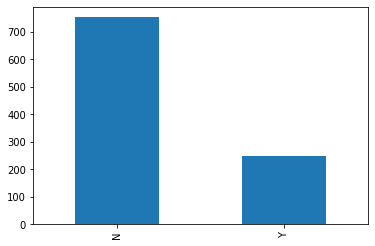

In [20]:
data['fraud_reported'].value_counts().plot.bar()

In [21]:
data['insured_sex'].value_counts()


FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

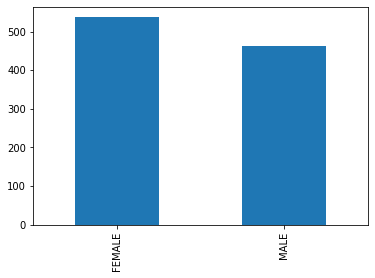

In [22]:
data['insured_sex'].value_counts().plot.bar()

In [23]:
data['insured_sexIndex'].value_counts()

0    537
1    463
Name: insured_sexIndex, dtype: int64

In [24]:
data.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_stateIndex,policy_cslIndex,insured_sexIndex,insured_education_levelIndex,insured_occupationIndex,insured_hobbiesIndex,insured_relationshipIndex,incident_typeIndex,collision_typeIndex,incident_severityIndex,authorities_contactedIndex,incident_stateIndex,incident_cityIndex,property_damageIndex,police_report_availableIndex,auto_makeIndex,auto_modelIndex,fraud_reportedIndex
0,328,48,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25 00:00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,0,0,1,3,5,17,3,1,1,2,0,1,2,2,2,2,13,1
1,228,42,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21 00:00:00,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,2,0,1,3,0,0,1,2,3,0,0,3,5,0,0,12,16,1
2,134,29,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22 00:00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,0,1,0,5,4,13,0,0,0,0,0,0,2,1,1,0,0,0
3,256,41,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10 00:00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1,0,0,5,9,13,5,1,2,2,0,6,1,0,1,4,21,1
4,228,44,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17 00:00:00,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,1,2,1,2,4,13,5,2,3,0,4,0,1,1,1,9,38,0


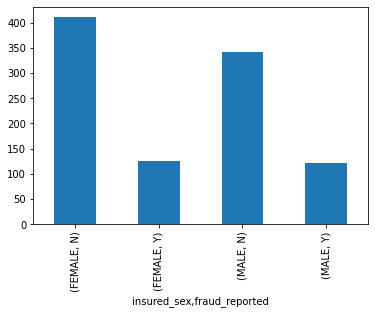

In [25]:
data.groupby('insured_sex')['fraud_reported'].value_counts().plot.bar()

In [26]:
data['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

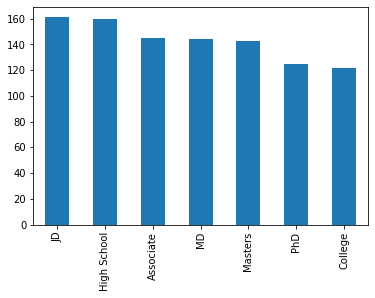

In [27]:
data['insured_education_level'].value_counts().plot.bar()

In [28]:
sex = data['insured_sex'].value_counts()
rel = data['insured_relationship'].value_counts()

label_sex = sex.index
size_sex = sex.values

label_rel = rel.index
size_rel = rel.values

colors = ['aqua', 'gold']
trace = go.Pie(
         labels = label_sex, values = size_sex, marker = dict(colors = colors), name = 'Gender', hole = 0.3)
colors2 = ['pink', 'lightblue','lightgreen','grey','red']
trace2 = go.Pie(labels = label_rel, values = size_rel, marker = dict(colors = colors2), name = 'Relationship',
                hole = 0.3)

df = [trace]
df2 = [trace2]

layout1 = go.Layout(
           title = 'Gender of the Customers')
layout2 = go.Layout(
           title = 'Relationship')

fig = go.Figure(data = df, layout = layout1)
fig2 = go.Figure(data = df2, layout = layout2)
py.iplot(fig)
py.iplot(fig2)

In [29]:
data['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [30]:
data.groupby('authorities_contacted')['fraud_reported']

In [31]:
df1=data[['authorities_contacted','fraud_reportedIndex']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reportedIndex', ascending = False)
df1                

,authorities_contacted,fraud_reportedIndex
3,Other,0.318182
0,Ambulance,0.290816
1,Fire,0.269058
4,Police,0.208904
2,None,0.065934


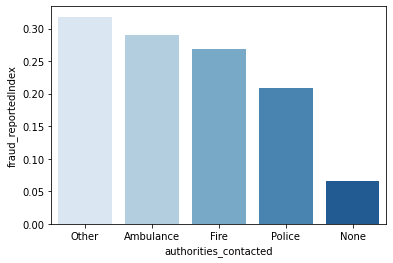

In [32]:
sns.barplot(x='authorities_contacted',y='fraud_reportedIndex',data=df1,palette = "Blues")

In [33]:
df2=data[['insured_education_level','fraud_reportedIndex']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reportedIndex', ascending = False)
df2                

,insured_education_level,fraud_reportedIndex
6,PhD,0.264000
4,MD,0.263889
1,College,0.262295
3,JD,0.260870
0,Associate,0.234483
2,High School,0.225000
5,Masters,0.223776


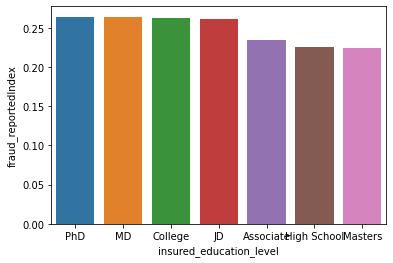

In [34]:
sns.barplot(x='insured_education_level',y='fraud_reportedIndex',data=df2)

In [35]:
df3=data[['insured_education_level','insured_sex','fraud_reportedIndex']].groupby(['insured_education_level','insured_sex'], 
                as_index = False).mean().sort_values(by = 'fraud_reportedIndex', ascending = False)
df3                

,insured_education_level,insured_sex,fraud_reportedIndex
9,MD,MALE,0.333333
13,PhD,MALE,0.290909
0,Associate,FEMALE,0.282353
5,High School,MALE,0.282051
6,JD,FEMALE,0.267442
2,College,FEMALE,0.265625
3,College,MALE,0.258621
7,JD,MALE,0.253333
12,PhD,FEMALE,0.242857
11,Masters,MALE,0.230769


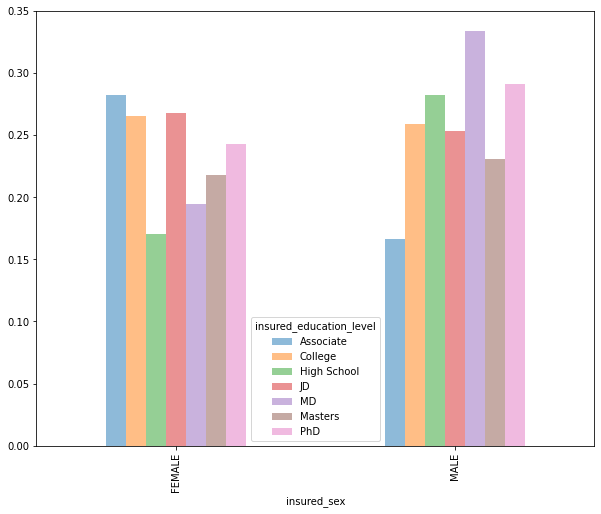

In [36]:
plt.rcParams["figure.figsize"] = (10,8)
df_pivot = pd.pivot_table(df3, values="fraud_reportedIndex",index="insured_sex",columns="insured_education_level", aggfunc=np.mean)
#Creating a grouped bar chart
ax = df_pivot.plot(kind="bar",alpha=0.5)

In [37]:
data['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [38]:
data.groupby('insured_occupation')['fraud_reported'].value_counts()

insured_occupation  fraud_reported
adm-clerical        N                 54
                    Y                 11
armed-forces        N                 52
                    Y                 17
craft-repair        N                 52
                    Y                 22
exec-managerial     N                 48
                    Y                 28
farming-fishing     N                 37
                    Y                 16
handlers-cleaners   N                 43
                    Y                 11
machine-op-inspct   N                 71
                    Y                 22
other-service       N                 59
                    Y                 12
priv-house-serv     N                 59
                    Y                 12
prof-specialty      N                 67
                    Y                 18
protective-serv     N                 49
                    Y                 14
sales               N                 55
                    Y 

In [39]:
df4=data[['insured_occupation','insured_sex','fraud_reportedIndex']].groupby(['insured_occupation','insured_sex'], 
                as_index = False).mean().sort_values(by = 'fraud_reportedIndex', ascending = False)
df4                

,insured_occupation,insured_sex,fraud_reportedIndex
9,farming-fishing,MALE,0.500000
7,exec-managerial,MALE,0.410256
6,exec-managerial,FEMALE,0.324324
26,transport-moving,FEMALE,0.315789
5,craft-repair,MALE,0.312500
23,sales,MALE,0.294118
24,tech-support,FEMALE,0.288889
4,craft-repair,FEMALE,0.285714
25,tech-support,MALE,0.272727
13,machine-op-inspct,MALE,0.265306


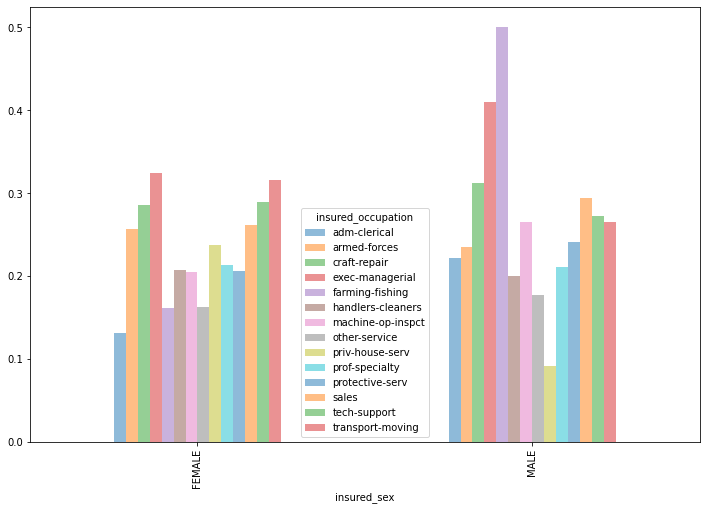

In [40]:
plt.rcParams["figure.figsize"] = (12,8)
df_pivot = pd.pivot_table(df4, values="fraud_reportedIndex",index="insured_sex",columns="insured_occupation", aggfunc=np.mean)
#Creating a grouped bar chart
ax = df_pivot.plot(kind="bar",alpha=0.5)

## **Model Building**

In [41]:
data.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_stateIndex,policy_cslIndex,insured_sexIndex,insured_education_levelIndex,insured_occupationIndex,insured_hobbiesIndex,insured_relationshipIndex,incident_typeIndex,collision_typeIndex,incident_severityIndex,authorities_contactedIndex,incident_stateIndex,incident_cityIndex,property_damageIndex,police_report_availableIndex,auto_makeIndex,auto_modelIndex,fraud_reportedIndex
0,328,48,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25 00:00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,0,0,1,3,5,17,3,1,1,2,0,1,2,2,2,2,13,1
1,228,42,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21 00:00:00,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,2,0,1,3,0,0,1,2,3,0,0,3,5,0,0,12,16,1
2,134,29,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22 00:00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,0,1,0,5,4,13,0,0,0,0,0,0,2,1,1,0,0,0
3,256,41,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10 00:00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1,0,0,5,9,13,5,1,2,2,0,6,1,0,1,4,21,1
4,228,44,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17 00:00:00,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,1,2,1,2,4,13,5,2,3,0,4,0,1,1,1,9,38,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   months_as_customer            1000 non-null   int64 
 1   age                           1000 non-null   int64 
 2   insured_sex                   1000 non-null   object
 3   insured_education_level       1000 non-null   object
 4   insured_occupation            1000 non-null   object
 5   insured_hobbies               1000 non-null   object
 6   insured_relationship          1000 non-null   object
 7   capital-gains                 1000 non-null   int64 
 8   capital-loss                  1000 non-null   int64 
 9   incident_date                 1000 non-null   object
 10  incident_type                 1000 non-null   object
 11  collision_type                1000 non-null   object
 12  incident_severity             1000 non-null   object
 13  authorities_contact

In [43]:
data.drop(data.iloc[:,2:23],inplace=True,axis=1)

In [44]:
data.head()

,months_as_customer,age,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_stateIndex,policy_cslIndex,insured_sexIndex,insured_education_levelIndex,insured_occupationIndex,insured_hobbiesIndex,insured_relationshipIndex,incident_typeIndex,collision_typeIndex,incident_severityIndex,authorities_contactedIndex,incident_stateIndex,incident_cityIndex,property_damageIndex,police_report_availableIndex,auto_makeIndex,auto_modelIndex,fraud_reportedIndex
0,328,48,71610,6510,13020,52080,Saab,92x,2004,Y,0,0,1,3,5,17,3,1,1,2,0,1,2,2,2,2,13,1
1,228,42,5070,780,780,3510,Mercedes,E400,2007,Y,2,0,1,3,0,0,1,2,3,0,0,3,5,0,0,12,16,1
2,134,29,34650,7700,3850,23100,Dodge,RAM,2007,N,0,1,0,5,4,13,0,0,0,0,0,0,2,1,1,0,0,0
3,256,41,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1,0,0,5,9,13,5,1,2,2,0,6,1,0,1,4,21,1
4,228,44,6500,1300,650,4550,Accura,RSX,2009,N,1,2,1,2,4,13,5,2,3,0,4,0,1,1,1,9,38,0


In [45]:
data.drop(data.iloc[:,6:10],inplace=True,axis=1)

In [46]:
data.head()

,months_as_customer,age,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_stateIndex,policy_cslIndex,insured_sexIndex,insured_education_levelIndex,insured_occupationIndex,insured_hobbiesIndex,insured_relationshipIndex,incident_typeIndex,collision_typeIndex,incident_severityIndex,authorities_contactedIndex,incident_stateIndex,incident_cityIndex,property_damageIndex,police_report_availableIndex,auto_makeIndex,auto_modelIndex,fraud_reportedIndex
0,328,48,71610,6510,13020,52080,0,0,1,3,5,17,3,1,1,2,0,1,2,2,2,2,13,1
1,228,42,5070,780,780,3510,2,0,1,3,0,0,1,2,3,0,0,3,5,0,0,12,16,1
2,134,29,34650,7700,3850,23100,0,1,0,5,4,13,0,0,0,0,0,0,2,1,1,0,0,0
3,256,41,63400,6340,6340,50720,1,0,0,5,9,13,5,1,2,2,0,6,1,0,1,4,21,1
4,228,44,6500,1300,650,4550,1,2,1,2,4,13,5,2,3,0,4,0,1,1,1,9,38,0


In [47]:
# features will be saved as X and our target will be saved as y
x = data.drop('fraud_reportedIndex',axis=1)
y = data['fraud_reportedIndex'].copy()

In [48]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 23)
(200, 23)
(800,)
(200,)


In [49]:
# Fitting logistic regression on train data.
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# Getting the model coefficients.
clf.coef_

array([[ 7.45858043e-03, -1.00686975e-01,  6.21641329e-06,
        -1.60994762e-05,  1.39680245e-05,  8.34786488e-06,
        -5.86172140e-03, -1.04295261e-02,  1.26983517e-03,
        -1.38236726e-02, -2.19434518e-02,  8.38181327e-02,
        -5.20739233e-03, -1.22128168e-02, -2.41724340e-02,
         3.48613703e-02, -9.25983123e-03,  2.59850293e-03,
        -2.46737593e-02, -6.61332352e-03, -8.16613867e-03,
         4.02364052e-03,  4.10595277e-03]])

In [51]:
# Getting the model intercepts.
clf.intercept_

array([-0.00520537])

In [52]:
# predicting the probabilities for the churn.
train_pred=clf.predict_proba(x_train)
test_pred=clf.predict_proba(x_test)

In [53]:
train_pred[0:1]

array([[0.67849962, 0.32150038]])

In [54]:
# Predicting the classes for the churn.
train_class_pred=clf.predict(x_train)
test_class_pred=clf.predict(x_test)

In [55]:
train_class_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [57]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.76625
The accuracy on test data is  0.715


[[601   9]
 [178  12]]


[Text(0, 0.5, 'Fraud'), Text(0, 1.5, 'Not fraud')]

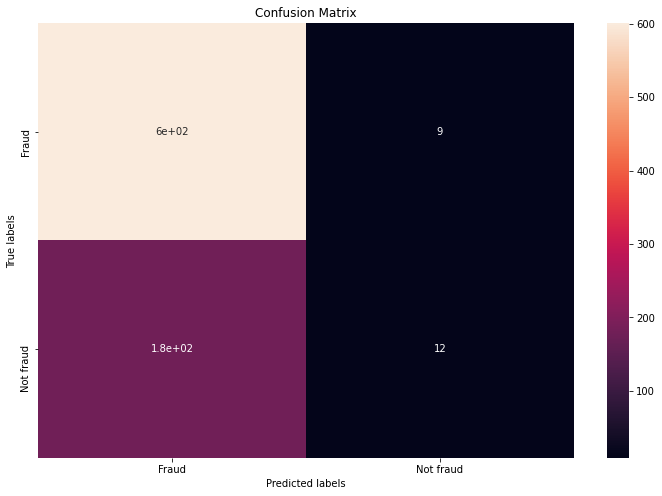

In [58]:
# Get the confusion matrix for both train and test
labels = ['Fraud', 'Not fraud']
cm = confusion_matrix(y_train, train_class_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[141   2]
 [ 55   2]]


[Text(0, 0.5, 'Fraud'), Text(0, 1.5, 'Not fraud')]

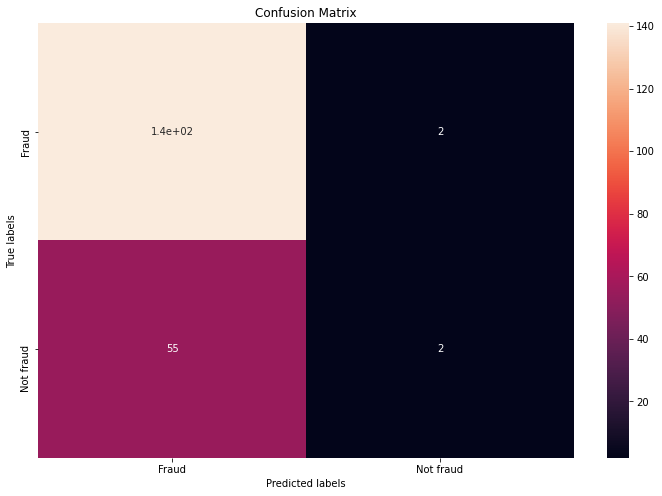

In [59]:
# Get the confusion matrix for both train and test
labels = ['Fraud', 'Not fraud']
cm = confusion_matrix(y_test, test_class_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Decision Tree**

In [61]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
y_train_pred=clf.predict(x_train)

In [62]:
y_test_pred=clf.predict(x_test)

In [65]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0])

In [70]:
y_test[:9]

993    0
859    0
298    0
553    0
672    0
971    0
27     1
231    0
306    1
Name: fraud_reportedIndex, dtype: int64

In [73]:
print('Decision tree accuracy on training set is:',accuracy_score(y_train,y_train_pred))
print('Decision tree accuracy on training set is:',accuracy_score(y_test,y_test_pred))

Decision tree accuracy on training set is: 1.0
Decision tree accuracy on training set is: 0.78


In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(x_train, y_train)

print("Best parameters for grid search:", grid_cv.best_params_)
print("Cross validation score for grid search", grid_cv.best_score_)
print("Train AUC ROC Score for grid search: ", roc_auc_score(y_train, grid_cv.predict(x_train)))
print("Test AUC ROC Score for grid search: ", roc_auc_score(y_test, grid_cv.predict(x_test)))

Best parameters for grid search: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Cross validation score for grid search 0.8383786704336907
Train AUC ROC Score for grid search:  0.7390854184641934
Test AUC ROC Score for grid search:  0.7053735737946264


In [97]:
insurance_fraud=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=4,min_samples_split=2)
insurance_fraud.fit(x_train,y_train)
y1_test_pred=insurance_fraud.predict(x_train)

In [88]:
accuracy_score(y_train,y1_test_pred)

0.845

In [93]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

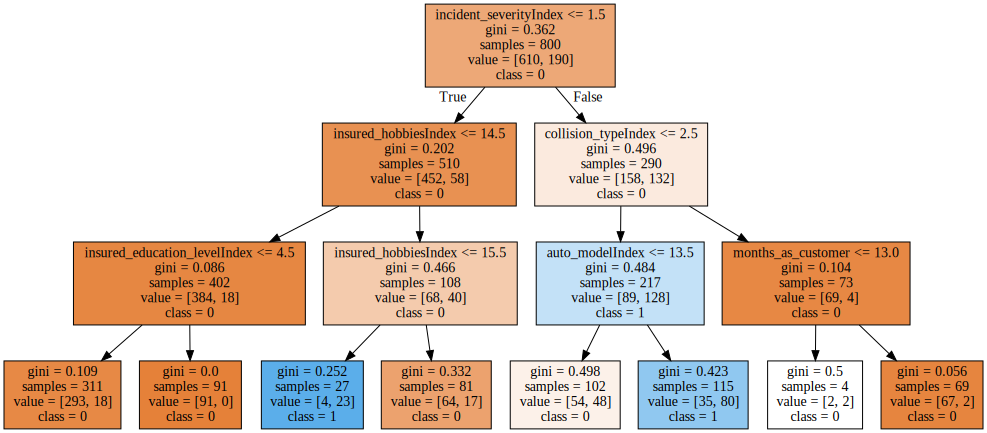

In [98]:
graph = Source(tree.export_graphviz(insurance_fraud, out_file=None
   , feature_names=x_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

## **XGBoost Classifier**

In [99]:
pip install xgboost

In [100]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [103]:
y_xgb_train_pred=xgb.predict(x_train)

In [104]:
y_xgb_test_pred=xgb.predict(x_test)
y_xgb_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0])

In [102]:
accuracy_score(y_test,y_xgb_test_pred)

0.81

In [105]:
print('XGBoost accuracy score on training data:',accuracy_score(y_train,y_xgb_train_pred))
print('XGBoost accuracy score on test data:',accuracy_score(y_test,y_xgb_test_predict))

XGBoost accuracy score on training data: 0.95125
XGBoost accuracy score on test data: 0.81
